## Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\user\\Desktop\\illegacy.txt', sep="\t", header=0)
print(df.head(10), df.columns)

        Country  Illit  Births
0       Albania   20.5    1.78
1       Algeria   39.1    2.44
2       Bahrain   15.0    2.34
3        Belize    5.9    2.97
4         Benin   73.5    5.60
5       Bolivia   18.5    3.65
6      Botswana   17.6    3.03
7        Brazil   11.9    2.29
8        Brunei   11.5    2.38
9  Burkina Faso   83.4    5.90 Index(['Country', 'Illit', 'Births'], dtype='object')


In [5]:
df.corr(method='pearson')

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


In [6]:
df.corr(method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


## Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.
Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\user\\Desktop\\water.txt', sep="\t", header=0)
print(df.head(10), df.columns)

  location         town  mortality  hardness
0    South         Bath       1247       105
1    North   Birkenhead       1668        17
2    South   Birmingham       1466         5
3    North    Blackburn       1800        14
4    North    Blackpool       1609        18
5    North       Bolton       1558        10
6    North       Bootle       1807        15
7    South  Bournemouth       1299        78
8    North     Bradford       1637        10
9    South     Brighton       1359        84 Index(['location', 'town', 'mortality', 'hardness'], dtype='object')


In [8]:
df.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [9]:
df.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


### Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [13]:
df[df['location']  == 'South'].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [14]:
df[df['location']  == 'North'].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


## Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [3]:
#status   man       woman
#>=1     239(a)    203(b)
#<1      515(c)    718(d)    
import math

def matthews_corrcoef_my(a,b,c,d):
    chisl = a*b - c*d
    znam = math.sqrt(((a+c)*(a+d)*(b+d)*(b+c)))
    return(chisl/znam)
print(matthews_corrcoef_my(239, 203, 515, 718))


-0.4650648462982252


#### грейдер не жует мой ответ

## В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency.

In [5]:
from scipy.stats import chi2_contingency
import numpy as np
'''
The test statistic.

The p-value of the test


Degrees of freedom

expected : ndarray, same shape as observed

The expected frequencies, based on the marginal sums of the table.'''
obj = np.array([[239, 203], [515,718]])
chi2_contingency(obj)


(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[198.96597015, 243.03402985],
        [555.03402985, 677.96597015]]))

## В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки

In [3]:
#от нас хотят Z-критерий для разности неких долей (очевидно независимые выборки)

def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)
    
    
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

fem = np.append(np.ones(203), np.zeros(718))
mal = np.append(np.ones(239), np.zeros(515))

print ("95%% confidence interval for a difference between proportions: [%f, %f]"% proportions_diff_confint_ind(mal, fem))
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(mal, fem)))
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(mal, fem), 'less')) # наш случай
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(mal, fem), 'greater'))    

95% confidence interval for a difference between proportions: [0.053905, 0.139222]
p-value: 0.000008
p-value: 0.999996
p-value: 0.000004


## Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

                    Не доволен	Более или менее	      Доволен
                    
    Не очень счастлив	197	         111	               33

    Достаточно счастлив	382	         685	               331

    Очень счастлив	     110	     342	               333
______________________________________________________________________________________________________________________
Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [7]:
from scipy.stats import chi2_contingency
import numpy as np
'''вообще для небольших выборок целесообразнее использовать:
1  точный тест фишера (гипергеометрическое распред.)
2  дельта хи квадрат (логарифмы)
'''
'''
The test statistic.

The p-value of the test

Degrees of freedom

expected : ndarray, same shape as observed

The expected frequencies, based on the marginal sums of the table.'''

chi2_contingency([[197, 111, 33], [382, 685, 331], [110, 342, 333]])

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

## Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки

In [8]:
# sqrt(stat hi squared / n*(r-1)*(c-1))
# где n -можность выборки, r - количество столбцов, c - количество строк contingency table
import math
from scipy.stats import chi2_contingency
import numpy as np

def v_kramer (matrix):
    hi_squared = chi2_contingency(matrix)[0]
    n = 0
    c = 0
    for i in matrix:
        n += sum(i)
        c += 1   
    r = len(i)
    
    phi2 = hi_squared/n
    
    phi2corr = max(0, phi2 - ((c-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = c - ((c-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

print(v_kramer([[197, 111, 33], [382, 685, 331], [110, 342, 333]]))

0.23964751409931453


## Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. На каждом датасете был посчитан AUC каждого классификатора. Данные записаны в файле:
Используя критерий знаковых рангов, проведите попарное сравнение каждого классификатора с каждым. Выберите два классификатора, различие между которыми наиболее статистически значимо.

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\user\\Desktop\\aucs.txt', sep="\t", header=0)
print(df.head(10), df.columns)

                Unnamed: 0   C4.5  C4.5+m  C4.5+cf  C4.5+m+cf
0           adult (sample)  0.763   0.768    0.771      0.798
1            breast cancer  0.599   0.591    0.590      0.569
2  breast cancer wisconsin  0.954   0.971    0.968      0.967
3                      cmc  0.628   0.661    0.654      0.657
4               ionosphere  0.882   0.888    0.886      0.898
5                     iris  0.936   0.931    0.916      0.931
6          liver disorders  0.661   0.668    0.609      0.685
7              lung cancer  0.583   0.583    0.563      0.625
8             lymphography  0.775   0.838    0.866      0.875
9                 mushroom  1.000   1.000    1.000      1.000 Index(['Unnamed: 0', 'C4.5', 'C4.5+m', 'C4.5+cf', 'C4.5+m+cf'], dtype='object')


In [46]:
# можно применить критерий знаковых рангов Вилкоксона. на вход - попарные разности.
from scipy.stats import wilcoxon
P_val_list = []
columns = list(df)[1:]
print('1st   2nd   p val')
i = 0
while i < len(columns):        
    ii = i+1
    while ii < len(columns):
        dif = df[columns[i]] - df[columns[ii]]
        print(columns[i], columns[ii], wilcoxon(dif)[1])
        P_val_list.append(wilcoxon(dif)[1])
        ii += 1   
    i += 1    

1st   2nd   p val
C4.5 C4.5+m 0.01075713311978963
C4.5 C4.5+cf 0.861262330095348
C4.5 C4.5+m+cf 0.015906444101703374
C4.5+m C4.5+cf 0.046332729793395394
C4.5+m C4.5+m+cf 0.3278256758446406
C4.5+cf C4.5+m+cf 0.022909099354356588


## Сравнивая 4 классификатора между собой, мы проверили 6 гипотез. Давайте сделаем поправку на множественную проверку. Начнём с метода Холма. Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки этим методом?

In [47]:
from statsmodels.sandbox.stats.multicomp import multipletests
multipletests(P_val_list, alpha=0.05, method='holm')

(array([False, False, False, False, False, False]),
 array([0.0645428 , 0.86126233, 0.07953222, 0.13899819, 0.65565135,
        0.0916364 ]),
 0.008512444610847103,
 0.008333333333333333)

### Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки методом Бенджамини-Хохберга?

In [48]:
multipletests(P_val_list, alpha=0.05, method='fdr_bh')

(array([ True, False,  True, False, False,  True]),
 array([0.0458182 , 0.86126233, 0.0458182 , 0.06949909, 0.39339081,
        0.0458182 ]),
 0.008512444610847103,
 0.008333333333333333)

# Давайте проанализируем данные опроса 4361 женщин из Ботсваны:

## Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\user\\Desktop\\botswana.tsv', sep="\t", header=0)
print(df.columns)

Index(['ceb', 'age', 'educ', 'religion', 'idlnchld', 'knowmeth', 'usemeth',
       'evermarr', 'agefm', 'heduc', 'urban', 'electric', 'radio', 'tv',
       'bicycle'],
      dtype='object')


In [18]:
print(df['religion'].unique())

['catholic' 'protestant' 'spirit' 'other']


## Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски?

In [19]:
missing_data = df.isnull()
print(missing_data.head(5))
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("")    

     ceb    age   educ  religion  idlnchld  knowmeth  usemeth  evermarr  \
0  False  False  False     False     False     False    False     False   
1  False  False  False     False     False     False    False     False   
2  False  False  False     False     False     False    False     False   
3  False  False  False     False     False     False    False     False   
4  False  False  False     False     False     False    False     False   

   agefm  heduc  urban  electric  radio     tv  bicycle  
0   True   True  False     False  False  False    False  
1  False  False  False     False  False  False    False  
2  False  False  False     False  False  False    False  
3   True   True  False     False  False  False    False  
4  False  False  False     False  False  False    False  


In [20]:
#количество строк с пропущенными величинами
df.shape[0] - df.dropna().shape[0]

2527

В разных признаках пропуски возникают по разным причинам и должны обрабатываться по-разному.

Например, в признаке agefm пропуски стоят только там, где evermarr=0, то есть, они соответствуют женщинам, никогда не выходившим замуж. Таким образом, для этого признака NaN соответствует значению "не применимо".

В подобных случаях, когда признак x_1x 
1
​	  на части объектов в принципе не может принимать никакие значения, рекомендуется поступать так:

создать новый бинарный признак
x2={1,0,x1='не применимо',иначе;
заменить "не применимо" в x_1x 
1
​	  на произвольную константу cc, которая среди других значений x_1x 
1
​	  не встречается.
Теперь, когда мы построим регрессию на оба признака и получим модель вида
y=\beta_0 + \beta_1 x_1 + \beta_2 x_2,y=β 
0
​	 +β 
1
​	 x 
1
​	 +β 
2
​	 x 
2
​	 ,
на тех объектах, где x_1x 
1
​	  было измерено, регрессионное уравнение примет вид
y=\beta_0 + \beta_1 x,y=β 
0
​	 +β 
1
​	 x,
а там, где x_1x 
1
​	  было "не применимо", получится
y=\beta_0 + \beta_1 c + \beta_2.y=β 
0
​	 +β 
1
​	 c+β 
2
​	 .
Выбор cc влияет только на значение и интерпретацию \beta_2β 
2
​	 , но не \beta_1β 
1
​	 .

Давайте используем этот метод для обработки пропусков в agefm и heduc.

1 Создайте признак nevermarr, равный единице там, где в agefm пропуски.

2 Удалите признак evermarr — в сумме с nevermarr он даёт константу, значит, в нашей матрице XX будет мультиколлинеарность.

3 Замените NaN в признаке agefm на c_{agefm}=0c 
agefm =0.

4 У объектов, где nevermarr = 1, замените NaN в признаке heduc на c_{heduc_1}=-1
cheduc1=−1 (ноль использовать нельзя, так как он уже встречается у некоторых объектов выборки).

Сколько осталось пропущенных значений в признаке heduc?

In [21]:
print(df.head())

   ceb  age  educ    religion  idlnchld  knowmeth  usemeth  evermarr  agefm  \
0    0   18    10    catholic       4.0       1.0      1.0         0    NaN   
1    2   43    11  protestant       2.0       1.0      1.0         1   20.0   
2    0   49     4      spirit       4.0       1.0      0.0         1   22.0   
3    0   24    12       other       2.0       1.0      0.0         0    NaN   
4    3   32    13       other       3.0       1.0      1.0         1   24.0   

   heduc  urban  electric  radio   tv  bicycle  
0    NaN      1       1.0    1.0  1.0      1.0  
1   14.0      1       1.0    1.0  1.0      1.0  
2    1.0      1       1.0    1.0  0.0      0.0  
3    NaN      1       1.0    1.0  1.0      1.0  
4   12.0      1       1.0    1.0  1.0      1.0  


In [22]:
#Создайте признак nevermarr, равный единице там, где в agefm пропуски
df['nevermarr'] = missing_data['agefm']
df.loc[df.nevermarr == True, 'nevermarr'] = 1
df.loc[df.nevermarr == False, 'nevermarr'] = 0

#Замените NaN в признаке agefm на 0
df['agefm'].replace(np.nan, 0, inplace=True)

# Удалите признак evermar
df.drop(['evermarr'], axis=1, inplace=True)

# объектов, где nevermarr = 1, замените NaN в признаке heduc на -1 
df.loc[df['nevermarr'] == 1, 'heduc'] = -1

print(df.head(100))

    ceb  age  educ    religion  idlnchld  knowmeth  usemeth  agefm  heduc  \
0     0   18    10    catholic       4.0       1.0      1.0    0.0   -1.0   
1     2   43    11  protestant       2.0       1.0      1.0   20.0   14.0   
2     0   49     4      spirit       4.0       1.0      0.0   22.0    1.0   
3     0   24    12       other       2.0       1.0      0.0    0.0   -1.0   
4     3   32    13       other       3.0       1.0      1.0   24.0   12.0   
5     1   30     5      spirit       5.0       1.0      0.0   24.0    7.0   
6     3   42     4       other       3.0       1.0      0.0   15.0   11.0   
7     1   36     7       other       4.0       1.0      1.0   24.0    9.0   
8     4   37    16    catholic       4.0       1.0      1.0   26.0   17.0   
9     1   34     5  protestant       4.0       1.0      1.0   18.0    3.0   
10    3   42    15       other       3.0       1.0      1.0   24.0   16.0   
11    3   29     7      spirit       6.0       1.0      1.0   24.0    7.0   

In [15]:
#количество строк с пропущенными величинами
df.shape[0] - df.dropna().shape[0]

307

Избавимся от оставшихся пропусков.

Для признаков idlnchld, heduc и usemeth проведите операцию, аналогичную предыдущей: создайте индикаторы пропусков по этим признакам (idlnchld_noans, heduc_noans, usemeth_noans), замените пропуски на нехарактерные значения 

idlnchld = −1

heduc2 =−2

usemeth =−1

Остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. Их очень мало, так что удалите объекты, на которых их значения пропущены.

Какого размера теперь наша матрица данных? Умножьте количество строк на количество всех столбцов (включая отклик ceb).

In [23]:
df['idlnchld'].replace(np.nan, -1, inplace=True)
df['heduc'].replace(np.nan, -2, inplace=True)
df['usemeth'].replace(np.nan, -1, inplace=True)
df.dropna(inplace=True)
df.shape[0] - df.dropna().shape[0]

0

In [25]:
#теперь нет пропущенных значений
df.info()
print(4348*15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4360
Data columns (total 15 columns):
ceb          4348 non-null int64
age          4348 non-null int64
educ         4348 non-null int64
religion     4348 non-null object
idlnchld     4348 non-null float64
knowmeth     4348 non-null float64
usemeth      4348 non-null float64
agefm        4348 non-null float64
heduc        4348 non-null float64
urban        4348 non-null int64
electric     4348 non-null float64
radio        4348 non-null float64
tv           4348 non-null float64
bicycle      4348 non-null float64
nevermarr    4348 non-null int64
dtypes: float64(9), int64(5), object(1)
memory usage: 543.5+ KB
65220


### Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. Какой получился коэффициент детерминации R^2R 
2
 ? Округлите до трёх знаков после десятичной точки

In [35]:
import statsmodels.formula.api as smf

m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr',  data=df)
fitted = m1.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     477.9
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:05:04   Log-Likelihood:                -7767.4
No. Observations:                4348   AIC:                         1.557e+04
Df Residuals:                    4331   BIC:                         1.568e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


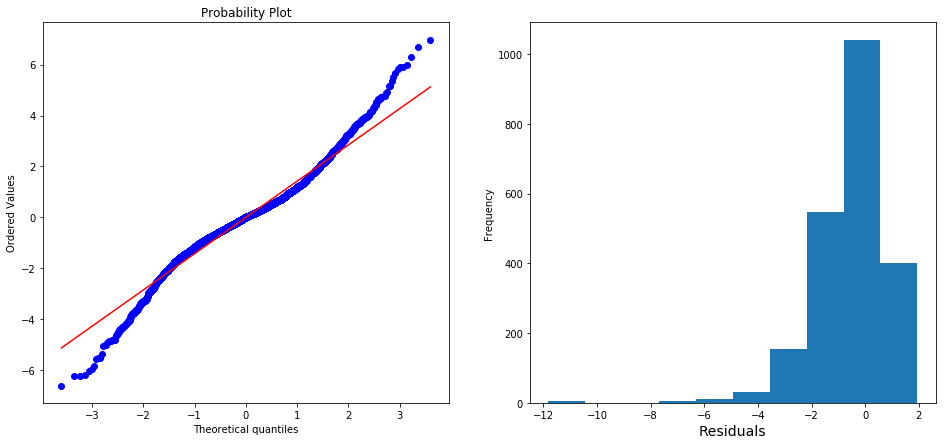

In [36]:

import scipy as sc

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

%pylab inline

plt.figure(figsize(16,7))
plt.subplot(121)
sc.stats.probplot(fitted.resid, dist="norm", plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

### Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она?

Если ошибка гетероскедастична, перенастройте модель, сделав поправку Уайта типа HC1.

In [37]:
print ('Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


 Ошибки гетероскедастичны, значит, значимость признаков может определяться неверно. Сделаем поправку Уайта:

In [39]:
m2 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr',  data=df)
fitted2 = m2.fit(cov_type='HC1')
print (fitted2.summary())


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     380.7
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:12:16   Log-Likelihood:                -7767.4
No. Observations:                4348   AIC:                         1.557e+04
Df Residuals:                    4331   BIC:                         1.568e+04
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

### Удалите из модели незначимые признаки religion, radio и tv. Проверьте гомоскедастичность ошибки, при необходимости сделайте поправку Уайта.

Не произошло ли значимого ухудшения модели после удаления этой группы признаков? Проверьте с помощью критерия Фишера. Чему равен его достигаемый уровень значимости? Округлите до четырёх цифр после десятичной точки.

Если достигаемый уровень значимости получился маленький, верните все удалённые признаки; если он достаточно велик, оставьте модель без религии, тв и радио.

In [46]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric  + bicycle + nevermarr',  data=df)
fitted3 = m3.fit()
print (fitted3.summary())
print ("F=%f, p=%f, k1=%f" % m3.fit().compare_f_test(m1.fit()))


                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     694.3
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:55:31   Log-Likelihood:                -7770.6
No. Observations:                4348   AIC:                         1.557e+04
Df Residuals:                    4336   BIC:                         1.564e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0350      0.197     -5.265      0.0